In [1]:
import numpy as np
import requests
from PIL import Image
from urllib.request import urlopen
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from IPython.core.display import display, HTML
from IPython.display import display_html
import pandas as pd
import seaborn as sns

In [2]:
url = "https://mtgdecks.net/Standard/most-played-cards"

r = requests.get(url)

In [3]:
soup = BeautifulSoup(r.text, 'html.parser')
tableHtml = str(soup.findAll("table", {"class": "table table-striped clickable"})[0])

In [4]:
dfs = pd.read_html(tableHtml)[0]
names = list(dfs[1])
dfs2 = pd.DataFrame()
dfs2['cardname'] = [' '.join(name.split(' ')[:-2]) for name in names]
dfs2['count'] = [int(name.split(' ')[-2]) for name in names]
#dfs2

In [5]:
# Example request: 'https://api.scryfall.com/cards/search?q=c%3Dwhite+cmc%3D1'
def req_wrapper(paramstr):
    cardsSite = "https://api.scryfall.com/cards/search?q="
    return requests.get(cardsSite + '!"' + paramstr.replace(' ', '+') + '"')

In [6]:
price = []
rarity = []

for name in dfs2['cardname']:
    req = req_wrapper(name).json()['data']
    
    if (len(req) != 1):
        raise ValueError('for card', name, 'request was', req)
    price += [req[0]['prices']['eur']]
    rarity += [req[0]['rarity']]

dfs2['price'] = price
dfs2['rarity'] = rarity
dfs2

,cardname,count,price,rarity
0,Fabled Passage,19796,7.68,rare
1,Mystical Dispute,17268,0.77,uncommon
2,Hallowed Fountain,14684,7.40,rare
3,Steam Vents,14297,7.02,rare
4,"Teferi, Time Raveler",13644,18.16,rare
5,Shark Typhoon,12692,3.66,rare
6,Sacred Foundry,12174,6.94,rare
7,Elspeth Conquers Death,12029,1.57,rare
8,Omen of the Sea,11243,0.11,common
9,Raugrin Triome,10170,5.86,rare


In [7]:
dfs2['price'] = dfs2['price'].astype(float)

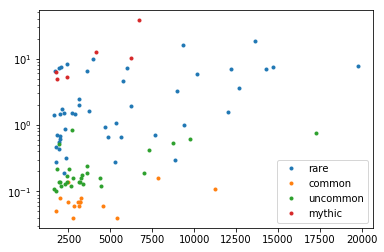

In [8]:
rarities = set(dfs2['rarity'])

plt.figure()
for rarity in rarities:
    fltr = dfs2[dfs2['rarity'] == rarity]
    plt.semilogy(fltr['count'], fltr['price'], '.', label=rarity)
    
plt.legend()
plt.show()

In [9]:
idxs = ~np.isnan(dfs2['price'])
np.corrcoef(dfs2['count'][idxs], dfs2['price'][idxs])

array([[1.        , 0.29925571],
       [0.29925571, 1.        ]])

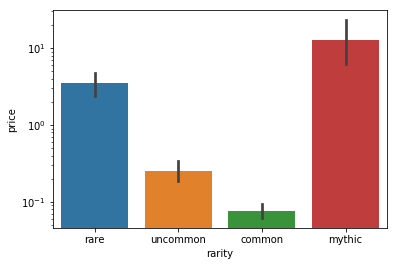

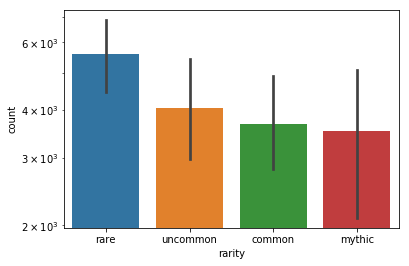

In [10]:
ax = sns.barplot(x="rarity", y="price", data=dfs2)
ax.set_yscale('log')
plt.show()

ax2 = sns.barplot(x="rarity", y="count", data=dfs2)
ax2.set_yscale('log')

In [11]:
fltr = dfs2[dfs2['rarity'] == 'mythic']
fltr
# fltr[np.argmax(fltr['count'])]

,cardname,count,price,rarity
20,"Uro, Titan of Nature's Wrath",6708,37.74,mythic
22,"Lukka, Coppercoat Outcast",6237,10.03,mythic
34,Brazen Borrower,4148,12.76,mythic
64,Cavalier of Flame,2425,5.23,mythic
90,Robber of the Rich,1804,4.89,mythic
91,Cavalier of Thorns,1765,6.32,mythic
99,"Kenrith, the Returned King",1628,NaN,mythic
